# Analysis of results

In [1]:
import os
import zipfile
import tempfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
normalize = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)

In [2]:
pth = os.path.join('preprocessR','brafi')
path = os.path.join(pth, 'out')
all_results = []
all_results_edges = []
ntop = 50
max_samples = 50

with tempfile.TemporaryDirectory() as tmpdir:
    print('Decompressing results to', tmpdir)
    with zipfile.ZipFile(f'{pth}/results.zip', 'r') as zr:
        zr.extractall(tmpdir)
    for subdir, dirs, files in os.walk(tmpdir):
        for d in dirs:
            current_path = os.path.join(subdir, d)
            for file in os.listdir(current_path):
                if len(all_results) >= max_samples:
                    break
                if file == 'nodes.csv':
                    results_path = os.path.join(current_path, file)
                    # Read the contents of the results.csv file into a DataFrame
                    df = pd.read_csv(results_path, index_col=0)
                    all_results.append(df)
                if file == 'edges.csv':
                    df_e = pd.read_csv(os.path.join(current_path, file), index_col=0)
                    all_results_edges.append(df_e)
len(all_results)

Decompressing results to /var/folders/yy/h2npb5ln7kb24_rgk0fz6_zc0000gn/T/tmp7slsiq0e


50

In [3]:
df_tfs = pd.read_csv(f"{pth}/tfs.tsv", sep='\t').pivot(index='source', columns='condition', values='score')
df_tfs = pd.DataFrame(df_tfs.values, index=df_tfs.index, columns=[0.5, 1, 2, 3, 4, 8])
df_tfs.head(5)

,0.5,1.0,2.0,3.0,4.0,8.0
source,,,,,,
AHR,5.864654,-0.111762,1.942149,-2.458497,-0.772374,-2.039000
AR,0.396351,-1.127806,3.599860,-0.103925,-2.752610,-1.601667
ARID3A,4.118432,-5.238932,2.135520,-0.171054,-2.646918,-2.259263
ARNT,1.386201,-1.720082,0.071262,-0.966686,-1.957377,1.534348
ARNTL,2.832561,-1.312460,-2.466556,-0.992061,-1.668221,-0.199922


In [4]:
df_tfs.sort_values(by=2.0).tail(10)

,0.5,1.0,2.0,3.0,4.0,8.0
source,,,,,,
TCF3,0.365783,-1.120970,4.564843,1.389116,0.576083,-5.196228
TEAD1,1.828291,-0.212442,4.689250,-0.710884,-2.209220,-5.513533
MITF,5.664733,-1.474513,4.832354,-4.426018,-2.712349,-1.724018
LYL1,1.778667,1.688397,5.162346,-0.241669,-1.146224,-6.342246
MEF2C,3.322919,-5.441437,5.389410,0.600300,-0.117992,-2.065605
FLI1,2.400423,-2.008249,5.431323,0.380754,-0.805946,-4.286398
HNF4A,6.073423,-1.400393,5.708702,-2.916943,0.989984,-6.591852
EGR1,12.282903,0.970294,6.858133,0.490504,-3.157071,-14.493583
GLI1,-1.458814,1.371825,7.839957,1.003514,-2.287892,-0.826369


In [5]:
measured = pd.read_csv(f'{pth}/data.tsv', sep='\t').feature.unique()
measured

array(['EGFR', 'ETS1', 'EGR1', 'SRF', 'ELK1', 'CREB1', 'FOSL2', 'STAT3',
       'SP1', 'NFKB1', 'RELA', 'JUN', 'FOXO4', 'JUNB', 'BHLHE40', 'ETS2',
       'HIF1A', 'STAT5B', 'KLF4', 'CTCF', 'GLI1', 'TFAP2A', 'FOXO3',
       'ATF4', 'JUND', 'TCF4', 'TCF7L2', 'PPARA', 'ELK4', 'LEF1', 'FOS',
       'STAT1', 'TBP', 'VDR', 'HNF4A', 'CEBPB', 'KLF6', 'ATF3', 'MEF2B',
       'NR2F1', 'ESR1', 'LYL1', 'TCF7L1', 'TP53', 'RBPJ', 'NFE2L2', 'AHR',
       'STAT5A', 'POU4F2', 'MITF', 'E2F6', 'MEF2A', 'MAX', 'TEAD1',
       'TAL1', 'MAFK', 'MEF2C', 'SMAD3', 'FLI1', 'ATF1', 'SMAD4', 'HBP1',
       'ARID3A', 'RELB', 'TCF3', 'NFYB', 'SP3', 'SMAD1', 'TEAD4', 'ZEB1',
       'KLF5', 'EPAS1', 'RUNX1', 'KDM5B', 'FOXL2', 'E2F4', 'PGR',
       'NFATC1', 'POU2F1', 'RARA', 'OTX2', 'ATF2', 'ZEB2', 'IRF2', 'TP63',
       'SOX9', 'TFAP4', 'NFKB2', 'CEBPA', 'NEUROD1', 'STAT4', 'ETV4',
       'E2F5', 'TEAD2', 'ASCL1', 'ERG', 'MAZ', 'MNT', 'ATF6', 'BACH1',
       'SPI1', 'GATA3', 'FOSL1', 'KLF13', 'PRDM1', 'ETV6', 'GATA2

In [7]:
df_avg = all_results[0].copy()
idx = df_avg.index

for df in all_results[1:]:
    df_avg += df.loc[idx]
df_avg /= len(all_results)
df_avg.to_csv(f'{path}/avg.csv')
df_avg

,t0.5_t0,t1_t0.5,t2_t1,t3_t2,t4_t3,t8_t4
CXCL1,0.00,0.00,0.00,0.00,0.00,0.00
LPAR1,0.00,0.00,0.00,0.00,0.00,0.00
CCNG1,0.00,0.00,0.00,0.00,0.00,0.00
ARHGAP11B,0.00,0.00,0.00,0.00,0.00,0.00
E2F7,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
_tp_pert_tp_t4_t3,0.02,0.02,0.02,0.02,0.02,0.02
_tp_meas_tp_t4_t3,0.00,0.00,0.00,0.00,0.00,0.00
_tp_pert_tp_t8_t4,0.04,0.04,0.04,0.04,0.04,0.04
_tp_meas_tp_t8_t4,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
df_avg_e = all_results_edges[0].copy()
df_avg_e_abs = all_results_edges[0].abs().copy()
idx = df_avg_e.index
cols = df_avg_e.columns

for df in all_results_edges[1:]:
    df_avg_e += df.loc[idx, cols]
    df_avg_e_abs += df.loc[idx, cols].abs()
df_avg_e /= len(all_results_edges)
df_avg_e_abs /= len(all_results_edges)
df_avg_e.to_csv(f'{path}/avg_edges.csv')
df_avg_e_abs.to_csv(f'{path}/avg_edges_abs.csv')
df_avg_e

,t0.5_t0,t1_t0.5,t2_t1,t3_t2,t4_t3,t8_t4
EFNA3--(1)--AATK,0.0,0.0,0.0,0.0,0.0,0.0
CAMK2A--(1)--PTK2,0.0,0.0,0.0,0.0,0.0,0.0
IL1A--(1)--IL1R1,0.0,0.0,0.0,0.0,0.0,0.0
TRAF2--(1)--TNIK,0.0,0.0,0.0,0.0,0.0,0.0
SKIL--(-1)--SMAD1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
ZEB1--(-1)--_tp_meas_tp_t8_t4,0.0,0.0,0.0,0.0,0.0,0.0
_tp_pert_tp_t8_t4--(1)--_meas_CTP,0.0,0.0,0.0,0.0,0.0,0.0
_meas_CTP-(1)-_t,1.0,1.0,1.0,1.0,1.0,1.0
_inflow,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# Across all networks, most common interaction w/E2F2 is through RB1, same for E2F1
df_avg_e[df_avg_e.index.str.endswith('E2F2')]

,t0.5_t0,t1_t0.5,t2_t1,t3_t2,t4_t3,t8_t4
TFDP1--(1)--E2F2,-0.061224,-0.061224,-0.061224,-0.020408,0.020408,0.224490
TFDP2--(1)--E2F2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RB1--(-1)--E2F2,-0.897959,0.448980,0.448980,0.408163,0.367347,0.653061


In [10]:
df_avg_e[df_avg_e.index.str.endswith('E2F1')].sort_values(by='t0.5_t0').head(5)

,t0.5_t0,t1_t0.5,t2_t1,t3_t2,t4_t3,t8_t4
RB1--(-1)--E2F1,-0.285714,0.224490,0.244898,0.285714,0.204082,0.326531
PARP1--(1)--E2F1,-0.244898,0.163265,-0.244898,0.163265,0.040816,0.244898
MAPK1--(1)--E2F1,-0.102041,0.081633,0.000000,0.122449,-0.040816,0.081633
MAPK3--(1)--E2F1,-0.081633,0.040816,0.040816,0.040816,0.020408,-0.020408
CREBBP--(1)--E2F1,-0.081633,-0.020408,0.020408,-0.020408,0.020408,-0.061224


In [11]:
idx_only_pred = df_avg.index.difference(measured).difference(df_avg.index[df_avg.index.str.startswith('_')]).tolist()
len(idx_only_pred)

4452

In [12]:
df_avg_nonempty = df_avg.loc[df_avg.abs().sum(axis=1) > 0]
df_avg_corr = df_avg_nonempty.T.corr()

In [13]:
def plot_corr_gene(gene, only_pred=True, only_measured=False, figsize=(20,8), threshold=0.25):
    fig, ax = plt.subplots(figsize=figsize);
    corrs = df_avg_corr.loc[gene].dropna().sort_values(ascending=False)
    corrs = corrs[corrs.abs()>=threshold]
    if only_pred:
        corrs = corrs.loc[corrs.index.intersection(idx_only_pred)]
    if only_measured:
        corrs = corrs.loc[corrs.index.intersection(measured)]
    corrs.plot.bar(ax=ax);  
    return corrs.index, fig, ax
    
#plot_corr_gene('SOS1', threshold=0.60, only_pred=False, only_measured=False);

Index(['EGR1', 'EGFR', 'ELK1', 'E2F1', 'E2F2', 'E2F4'], dtype='object')

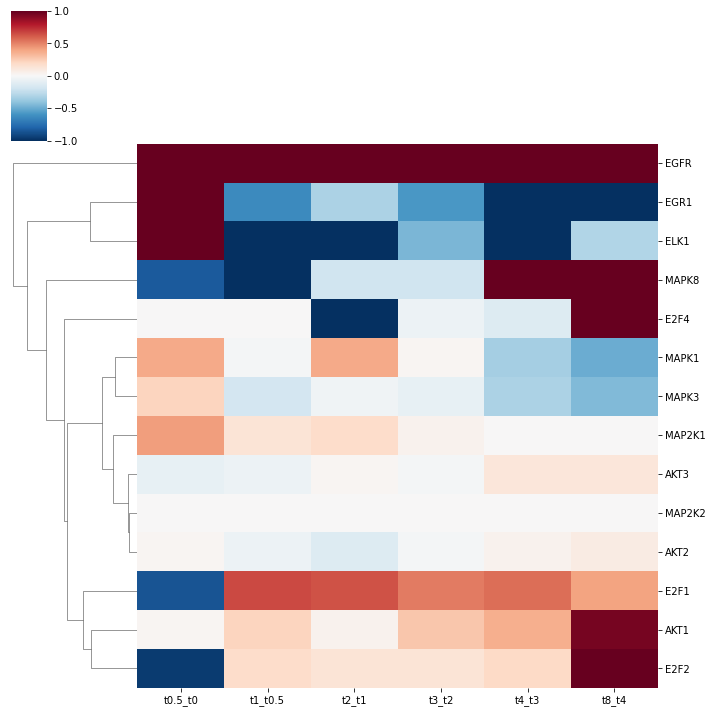

In [14]:
df_egf_init_pathways = df_avg.loc[['EGR1', 'EGFR', 'MAPK1', 'MAPK3', 'ELK1', 'MAPK8', 'MAP2K1', 'MAP2K2', 'AKT1', 'AKT2', 'AKT3','E2F1','E2F2','E2F4']]
sns.clustermap(df_egf_init_pathways, col_cluster=False, cmap=cm.RdBu_r, norm=normalize)
df_egf_init_pathways.index.intersection(measured)

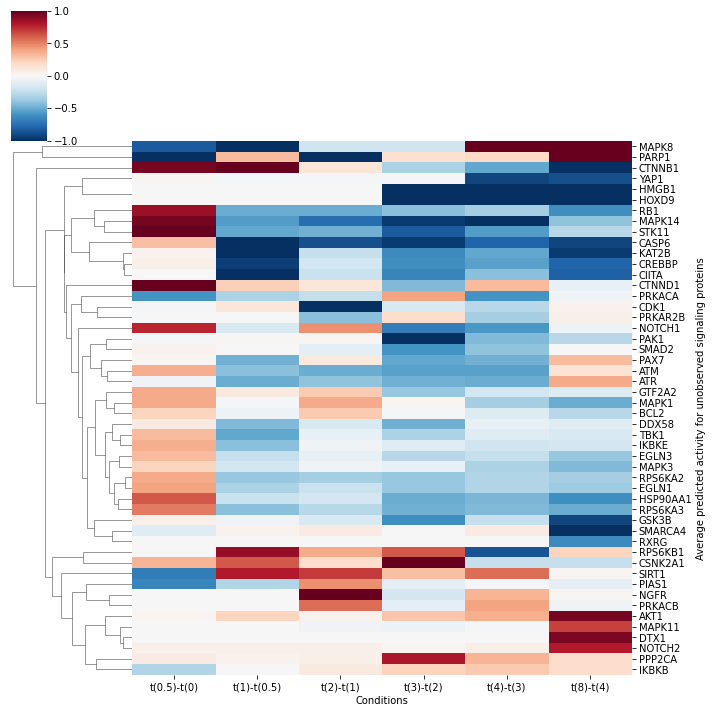

In [15]:
idx_top = df_avg.loc[idx_only_pred, :].std(axis=1).sort_values(ascending=False).head(ntop).index.tolist()
df_avg_only_pred = df_avg.loc[idx_top,:].copy()
df_avg_only_pred.columns = ["t(0.5)-t(0)", "t(1)-t(0.5)", "t(2)-t(1)", "t(3)-t(2)", "t(4)-t(3)", "t(8)-t(4)"]
df_avg_only_pred.columns.name = "Conditions"
df_avg_only_pred.index.name = "Average predicted activity for unobserved signaling proteins"
df_avg_only_pred.to_csv(f'{path}/pred_nodes_mean_top{ntop}_nsamples_{len(all_results)}.csv')
df_avg.to_csv(f'{path}/pred_nodes_mean_nsamples_{len(all_results)}.csv')
sns.clustermap(df_avg_only_pred, cmap=cm.RdBu_r, norm=normalize, yticklabels=True, col_cluster=False);
plt.savefig(f'{path}/heatmap_activity_nodes_only_pred_top{ntop}_averaged_runs.pdf', format='pdf');

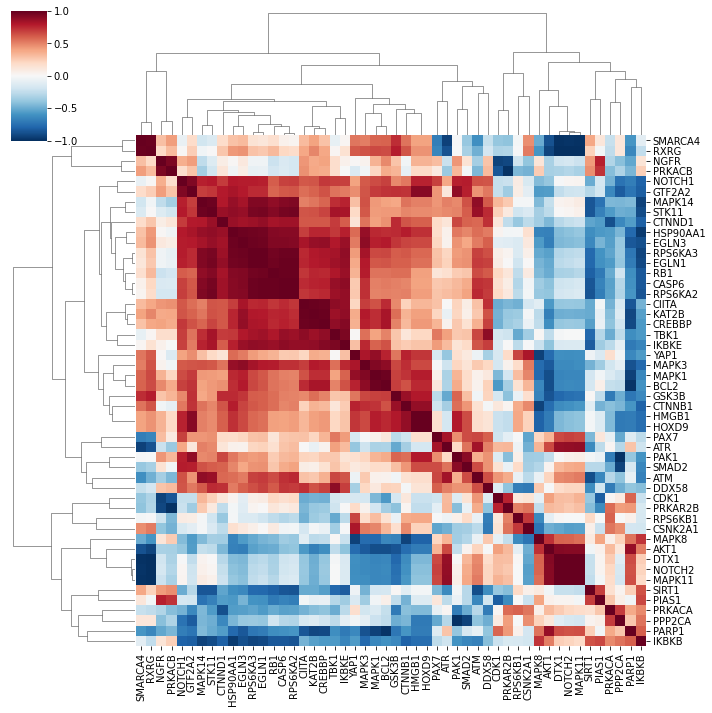

In [16]:
sns.clustermap(df_avg.loc[idx_top].T.corr(), cmap=cm.RdBu_r, norm=normalize, yticklabels=True, xticklabels=True);
plt.savefig(f'{path}/heatmap_correlation_activity_nodes_only_pred_top{ntop}_averaged_runs.pdf', format='pdf');

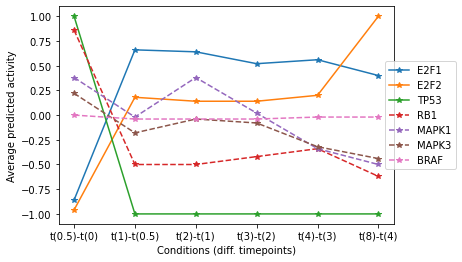

In [120]:
fig, ax = plt.subplots()
df_avg_subset = df_avg.loc[['E2F1', 'E2F2', 'TP53', 'RB1', 'MAPK1', 'MAPK3', 'BRAF']].copy()
df_avg_subset.columns = ['t(0.5)-t(0)', 't(1)-t(0.5)', 't(2)-t(1)', 't(3)-t(2)', 't(4)-t(3)', 't(8)-t(4)']
df_avg_subset = df_avg_subset.T
for col, style in zip(df_avg_subset.columns, ['-*', '-*', '-*', '--*', '--*', '--*', '--*', '--*']):
    df_avg_subset[col].plot(style=style, ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(0.96, 0.5));
ax.set_xlabel("Conditions (diff. timepoints)");
ax.set_ylabel("Average predicted activity");
plt.savefig(f"{path}/avg_activity_e2f1_e2f2.pdf", format="pdf", bbox_inches='tight')
#.legend();

In [34]:
df_avg_e_cytoscape = df_avg_e_abs[(df_avg_e_abs != 0).any(axis=1)].reset_index()
split_index = df_avg_e_cytoscape['index'].str.split('--', expand=True)
mask = split_index.iloc[:, 2].notnull()
df_avg_e_cytoscape = df_avg_e_cytoscape.loc[mask]
df_avg_e_cytoscape[['source', 'sign', 'target']] = split_index.values[mask]
df_avg_e_cytoscape['sign'] = df_avg_e_cytoscape['sign'].str.replace(r'\(|\)', '')
df_avg_e_cytoscape = df_avg_e_cytoscape.drop(columns=['index'])

<ipython-input-34-1cbd60de4e87>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_avg_e_cytoscape['sign'] = df_avg_e_cytoscape['sign'].str.replace(r'\(|\)', '')


In [35]:
df_avg_e_cytoscape

,t0.5_t0,t1_t0.5,t2_t1,t3_t2,t4_t3,t8_t4,source,sign,target
0,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,GSK3B,-1,CCND2
1,0.081633,0.081633,0.081633,0.081633,0.081633,0.081633,EGR1,1,DUSP4
2,0.000000,0.020408,0.020408,0.020408,0.020408,0.020408,PTPN1,1,TYK2
3,0.000000,0.000000,0.020408,0.020408,0.020408,0.020408,AKT1,1,FOXO4
4,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,HMGB1,1,HOXD9
...,...,...,...,...,...,...,...,...,...
2064,0.000000,0.020408,0.020408,0.020408,0.020408,0.020408,IRF2,-1,_tp_meas_tp_t2_t1
2065,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,_tp_pert_tp_t2_t1,1,_meas_CTP
2067,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,_tp_pert_tp_t3_t2,1,EGFR
2069,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,_tp_pert_tp_t4_t3,1,EGFR


In [45]:
df_avg_e_cytoscape.to_csv(f'{path}/df_avg_e_cytoscape.csv', index=False)

In [46]:
df_avg_n_cytoscape = df_avg[(df_avg != 0).any(axis=1)]
df_avg_n_cytoscape.to_csv(f'{path}/df_avg_n_cytoscape.csv', index=True)

In [57]:
df_avg_e_cytoscape_02 = df_avg_e_abs[(df_avg_e_abs > 0.2).any(axis=1)].reset_index()
split_index = df_avg_e_cytoscape_02['index'].str.split('--', expand=True)
mask = split_index.iloc[:, 2].notnull()
df_avg_e_cytoscape_02 = df_avg_e_cytoscape_02.loc[mask]
df_avg_e_cytoscape_02[['source', 'sign', 'target']] = split_index.values[mask]
df_avg_e_cytoscape_02['sign'] = df_avg_e_cytoscape_02['sign'].str.replace(r'\(|\)', '')
df_avg_e_cytoscape_02 = df_avg_e_cytoscape_02.drop(columns=['index'])
df_avg_n_cytoscape_02 = df_avg[(abs(df_avg) > 0.2).any(axis=1)]

<ipython-input-57-48758e47c11d>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_avg_e_cytoscape_02['sign'] = df_avg_e_cytoscape_02['sign'].str.replace(r'\(|\)', '')


In [58]:
df_avg_e_cytoscape_02

,t0.5_t0,t1_t0.5,t2_t1,t3_t2,t4_t3,t8_t4,source,sign,target
0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,HMGB1,1,HOXD9
1,0.000000,0.000000,0.000000,0.653061,0.653061,0.714286,MAPK14,1,HNF4A
2,0.265306,0.265306,0.285714,0.285714,0.285714,0.285714,JUN,1,SMAD4
3,0.000000,0.163265,0.204082,0.204082,0.204082,0.204082,RUNX1,-1,MYC
4,0.000000,0.061224,0.142857,0.142857,0.183673,0.204082,EGFR,1,E2F1
...,...,...,...,...,...,...,...,...,...
368,0.673469,0.673469,0.673469,0.673469,0.673469,0.673469,_tp_pert_tp_t05_t0,1,EGFR
369,0.142857,0.183673,0.183673,0.183673,0.183673,0.285714,ETV4,1,_tp_meas_tp_t05_t0
370,0.081633,0.122449,0.142857,0.204082,0.204082,0.204082,TFAP2A,1,_tp_meas_tp_t05_t0
371,0.122449,0.204082,0.285714,0.306122,0.428571,0.530612,ZBTB33,-1,_tp_meas_tp_t05_t0


In [59]:
df_avg_e_cytoscape_02.to_csv(f'{path}/df_avg_e_cytoscape_02.csv', index=False)
df_avg_n_cytoscape_02.to_csv(f'{path}/df_avg_n_cytoscape_02.csv', index=True)

In [ ]:
t_matrix_de = pd.read_csv(f"{pth}/t_matrix_de.tsv", sep='\t', index_col= 0)

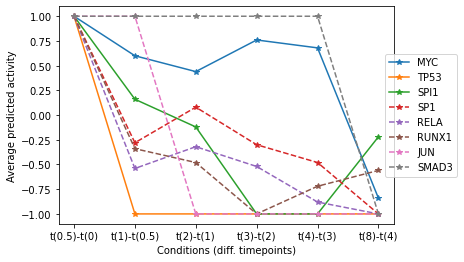

In [119]:
fig, ax = plt.subplots()
df_avg_subset = df_avg.loc[['MYC', 'TP53', 'SPI1', 'SP1', 'RELA', 'RUNX1', 'JUN','SMAD3']].copy()
df_avg_subset.columns = ['t(0.5)-t(0)', 't(1)-t(0.5)', 't(2)-t(1)', 't(3)-t(2)', 't(4)-t(3)', 't(8)-t(4)']
df_avg_subset = df_avg_subset.T
COL1A1 = t_matrix_de.loc[["COL1A1"]].transpose()
COL1A1.index = df_avg_subset.index.to_list()
#df_avg_subset = df_avg_subset.join(COL1A1)
for col, style in zip(df_avg_subset.columns, ['-*', '-*', '-*', '--*', '--*', '--*', '--*', '--*']):
    df_avg_subset[col].plot(style=style, ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(0.96, 0.5));
ax.set_xlabel("Conditions (diff. timepoints)");
ax.set_ylabel("Average predicted activity");
plt.savefig(f"{path}/avg_activity_MYC_SMAD3.pdf", format="pdf", bbox_inches='tight')

In [117]:
df_avg_subset

,MYC,TP53,SPI1,SP1,RELA,RUNX1,JUN,SMAD3,COL1A1
t(0.5)-t(0),1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.0,-0.307501
t(1)-t(0.5),0.60,-1.0,0.16,-0.28,-0.54,-0.34,1.0,1.0,-1.822666
t(2)-t(1),0.44,-1.0,-0.12,0.08,-0.32,-0.48,-1.0,1.0,0.230175
t(3)-t(2),0.76,-1.0,-1.00,-0.30,-0.52,-1.00,-1.0,1.0,2.165064
t(4)-t(3),0.68,-1.0,-1.00,-0.48,-0.88,-0.72,-1.0,1.0,-0.698463
t(8)-t(4),-0.84,-1.0,-0.22,-1.00,-1.00,-0.56,-1.0,-1.0,0.778660
